<p align="center">На основе анализа выбранных диапазонов данных 2-х временных рядов решите следующие задачи и ответьте на вопросы:</p>

1)  Постройте графики, визуализирующие каждый временной ряд. Охарактеризуйте временные ряды, присутствуют ли в них тренд, сезонность или цикл?

2) Так как временные ряды имеют пропуски (по нерабочим дням), восстановите пропущенные значения. Обоснуйте и опишите метод, который Вы будете использовать для восстановления пропущенных значений.

3) Преобразуйте временные ряды к стационарному виду. Обоснуйте и опишите методы, которые Вы использовали. Приведите графики и результаты статистических тестов, подтверждающих, что ряд стал стационарным.

4) Постройте и опишите коррелограммы (графики автокорреляционной функции и частной автокорреляционной функции) для 2-х временных рядов.

5) По каждому временному ряду разбейте выборку на обучающую и тестовую (обоснуйте выбор временного интервала для тестовой выборки). На основе обучающей выборки идентифицируйте параметры модели АРПСС (ARIMA) Какие параметры модели p, d и q Вы будете использовать и почему? Оцените качество модели. Насколько хорошо она предсказывает значения тестовой выборки?

6) Используя модель ARIMA, постройте прогноз 2-х временных рядов на 3 года вперёд от даты окончания временного диапазона (например, если у Вас временной диапазон 12.12.2013–29.12.2017, то до 29.12.2020, если у Вас временной диапазон 02.10.2017 – 17.11.2022, то до 17.11.2025), приведите их графики.

7) Проверьте с помощью соответствующих критериев адекватность (независимость и нормальность распределения остатков) каждой прогнозной модели для 2-х временных рядов, оцените качество прогнозной модели.

8) С учетом получившихся прогнозных значений для временного ряда №1 Вашего диапазона решите следующий кейс:

    Банк России ищет универсальный индикатор, который не содержит проблемы манипуляции данных (асимметрии информации). В качестве одного из таких индикаторов предлагается использовать объем средств на корреспондентских счетах Банка России. Необходимо оценить, возможно ли использовать показатель «Денежные средства кредитных организаций на корреспондентских счетах в Банке России (на начало операционного дня), млрд. руб., по России» для прогноза изменения задолженности по обеспеченным кредитам Банка России. Приведите Ваше обоснование возможности или невозможности использования данного показателя. Существует ли статистическая зависимость между показателем «Требования Банка России к кредитным организациям по кредитам (по оставшимся до погашения срокам), млн руб. (на начало дня)» по разным срокам погашения и показателя «Денежные средства кредитных организаций на корреспондентских счетах в Банке России (на начало операционного дня), млрд. руб., по России»? Охарактеризуйте и интерпретируйте обнаруженную статистическую зависимость или её отсутствие.

* 19.06.2019 – 16.10.2023  - Требования Банка России к кредитным организациям по кредитам (по оставшимся до погашения срокам), млн руб. (на начало дня), всего
* 01.04.2015 – 29.03.2019  - Сальдо операций Банка России по предоставлению / абсорбированию ликвидности, млрд руб.

In [9]:
import pandas as pd
data = pd.read_excel('Данные Банка России.xlsx',skiprows=2) # удалим перве 2 строки, тк из-за них назв столбцов будут сьеханы и работать будет невозможно 
# перемниуем 1, 2, 7, 8, 9 столбцы на a,b,c,d,e соответсвенно, где
# a - дата;   b - Всего;   c - по России;   d - Московский регион;  e - сальдо  
data.rename(columns={data.columns[0]: "a", data.columns[1]: "b", data.columns[8]: "c", data.columns[9]: "d", data.columns[10]: "e"}, inplace=True)
data.head()

,a,b,до 7 дней,от 8 до 30 дней,от 31 до 90 дней,от 91 до 180 дней,от 181 до 365 дней,более 365 дней,c,d,e
0,2023-10-16,7411164.50,4301651.01,1112629.30,1675810.82,27380.98,43154.18,250538.22,9789.0,9509.3,5882.5
1,2023-10-13,7479860.57,6199261.06,2608.15,956313.53,27432.61,43265.49,250979.73,9995.4,9731.3,6048.1
2,2023-10-12,7317256.87,6191545.02,2638.69,801313.53,27394.98,43298.45,251066.19,9679.9,9413.3,5645.1
3,2023-10-11,1204392.68,828608.48,2684.12,51313.53,27267.75,43322.65,251196.15,2252.8,2036.2,-1922.1
4,2023-10-10,1159347.51,725514.86,2641.65,109368.62,27270.70,43342.99,251208.69,2496.7,2285.3,-1650.7


### №1 Постройте графики, визуализирующие каждый временной ряд. Охарактеризуйте временные ряды, присутствуют ли в них тренд, сезонность или цикл?

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   a                   2183 non-null   datetime64[ns]
 1   b                   2183 non-null   float64       
 2   до 7 дней           2183 non-null   float64       
 3   от 8 до 30 дней     2183 non-null   float64       
 4   от 31 до 90 дней    2183 non-null   float64       
 5   от 91 до 180 дней   2183 non-null   float64       
 6   от 181 до 365 дней  2183 non-null   float64       
 7   более 365 дней      2183 non-null   float64       
 8   c                   2183 non-null   float64       
 9   d                   2183 non-null   float64       
 10  e                   2183 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 187.7 KB


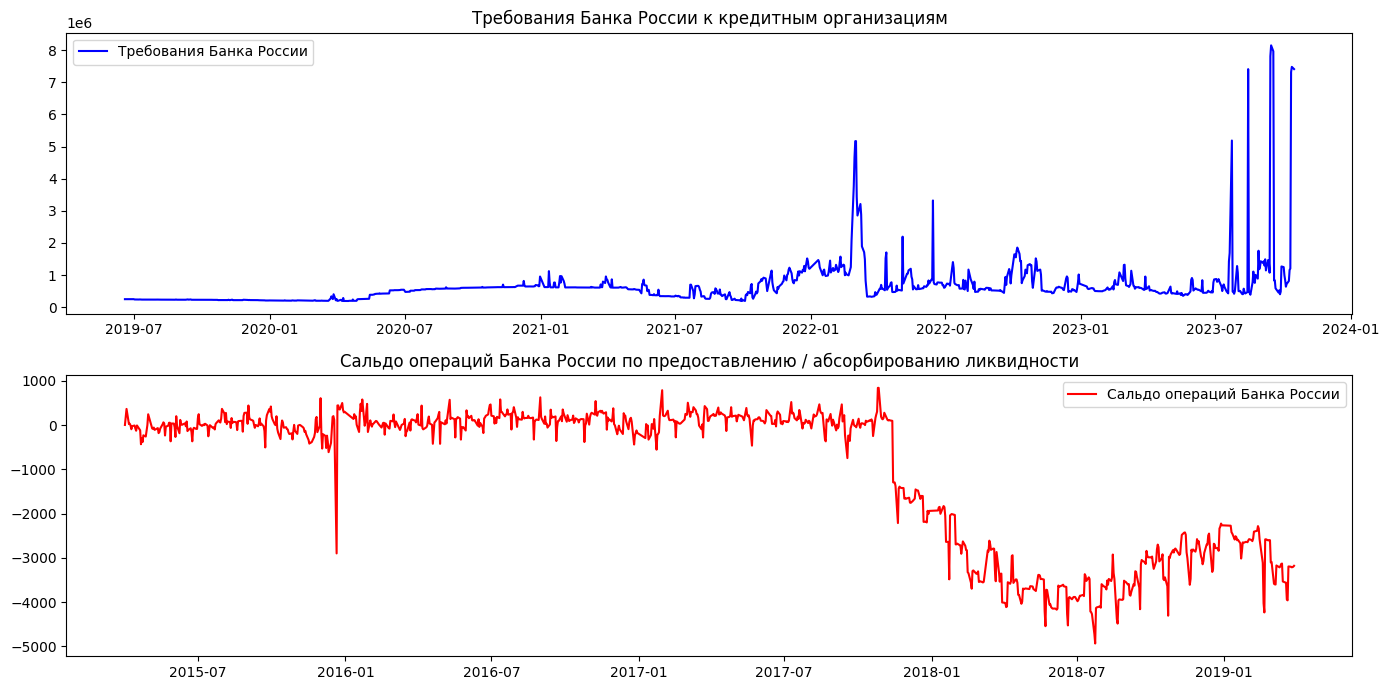

In [11]:
import matplotlib.pyplot as plt

# Преобразуем столбец с датами в формат datetime
data['a'] = pd.to_datetime(data['a'])
data.set_index('a', inplace=True)

# Отфильтровываем данные по заданным диапазонам дат
time_series_1 = data['b']['2019-06-19':'2023-10-16']  # Требования Банка России
time_series_2 = data['e']['2015-04-01':'2019-03-29']  # Сальдо операций Банка России
plt.figure(figsize=(14, 7))

# График для первого временного ряда
plt.subplot(2, 1, 1)
plt.plot(time_series_1, label='Требования Банка России', color='blue')
plt.title('Требования Банка России к кредитным организациям')
plt.legend()

# График для второго временного ряда
plt.subplot(2, 1, 2)
plt.plot(time_series_2, label='Сальдо операций Банка России', color='red')
plt.title('Сальдо операций Банка России по предоставлению / абсорбированию ликвидности')
plt.legend()

plt.tight_layout()
plt.show()


1. **Требования Банка России к кредитным организациям**: График показывает общую тенденцию к увеличению или уменьшению значений, значит присутствует тренд. Сильные всплески или пики, в конце временного интервала они возникают регулярно, это указывает на сезонность. Такие пики раньше появлялимь нерегулярно, это признак внешних воздействий или циклических колебаний.

2. **Сальдо операций Банка России**: Ряд с плавными колебаниями без четкой тенденции к росту или падению указывает на отсутствие тренда. Периодические колебания отражают сезонность, в то время как нерегулярные шоки или изменения связаны с экономическими циклами или политическими событиями.

### №2 Так как временные ряды имеют пропуски (по нерабочим дням), восстановите пропущенные значения. Обоснуйте и опишите метод, который Вы будете использовать для восстановления пропущенных значений.

In [18]:
# Выберем данные в указанном диапазоне
data_first_time_series = data['2019-06-19':'2023-10-16']  # Для первого временного ряда
data_second_time_series = data['2015-04-01':'2019-03-29']  # Для второго временного ряда

# Предполагаем, что пропуски в данных встречаются в нерабочие дни, их можно заполнить, используя интерполяцию
data_first_interpolated = data_first_time_series.interpolate(method='time')
data_second_interpolated = data_second_time_series.interpolate(method='time')

# Выбираем только колонки с датами и значениями временных рядов
selected_data_first = data_first_interpolated['b']
selected_data_second = data_second_interpolated['e']

# Выводим результаты для проверки (пример с выводом первых пяти строк)
print(selected_data_first.head())
print(selected_data_second.head())



a
2023-10-16    7411164.50
2023-10-13    7479860.57
2023-10-12    7317256.87
2023-10-11    1204392.68
2023-10-10    1159347.51
Name: b, dtype: float64
a
2019-03-29   -3180.5
2019-03-28   -3201.2
2019-03-27   -3209.9
2019-03-26   -3214.7
2019-03-25   -3200.8
Name: e, dtype: float64


Для восстановления пропущенных значений во временных рядах я выбрала метод линейной интерполяции, поскольку он прост в применении и часто эффективен для данных, которые изменяются относительно плавно во времени. Этот метод подразумевает заполнение пропусков путем построения линии между известными значениями (то есть точками данных) до и после пропуска. Полученные интерполированные значения располагаются на этой линии, что позволяет приближенно восстановить отсутствующие данные.

Линейная интерполяция является наиболее подходящей, когда пропущенные значения расположены между двумя известными точками данных и когда нет резких изменений или выбросов в данных, которые могли бы исказить результаты интерполяции. Она также подходит для данных без сильной сезонности или периодических колебаний, поскольку в таких случаях могут потребоваться более сложные методы интерполяции.

В случае наличия сезонности или более сложных структур в данных можно было бы рассмотреть другие методы, такие как интерполяция сплайнами или методы, основанные на моделях машинного обучения, которые могут учитывать эти характеристики и предоставить более точные оценки пропущенных значений.

### №3 Преобразуйте временные ряды к стационарному виду. Обоснуйте и опишите методы, которые Вы использовали. Приведите графики и результаты статистических тестов, подтверждающих, что ряд стал стационарным.

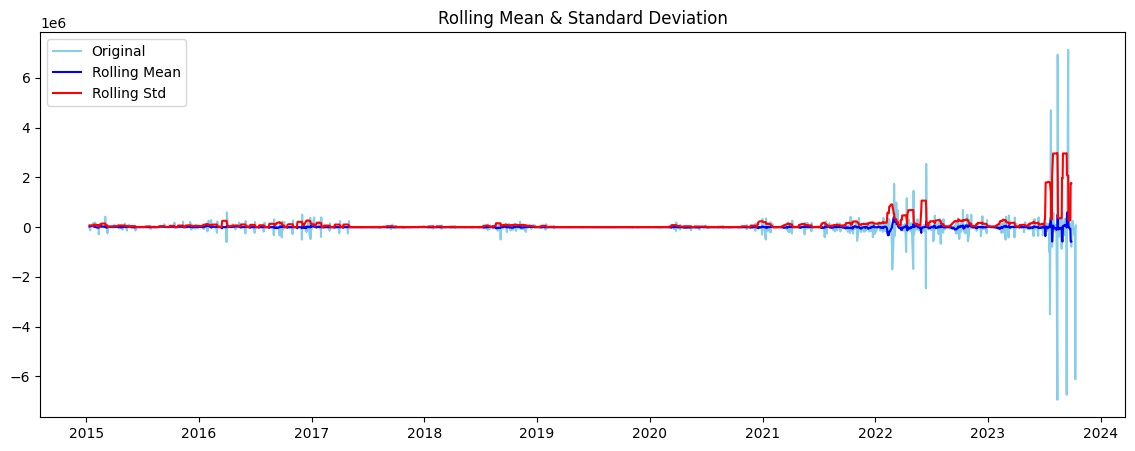

Dickey-Fuller Test:
Test Statistic                -1.298403e+01
p-value                        2.903515e-24
#Lags Used                     2.500000e+01
Number of Observations Used    2.156000e+03
Critical Value (1%)           -3.433387e+00
Critical Value (5%)           -2.862881e+00
Critical Value (10%)          -2.567484e+00
dtype: float64


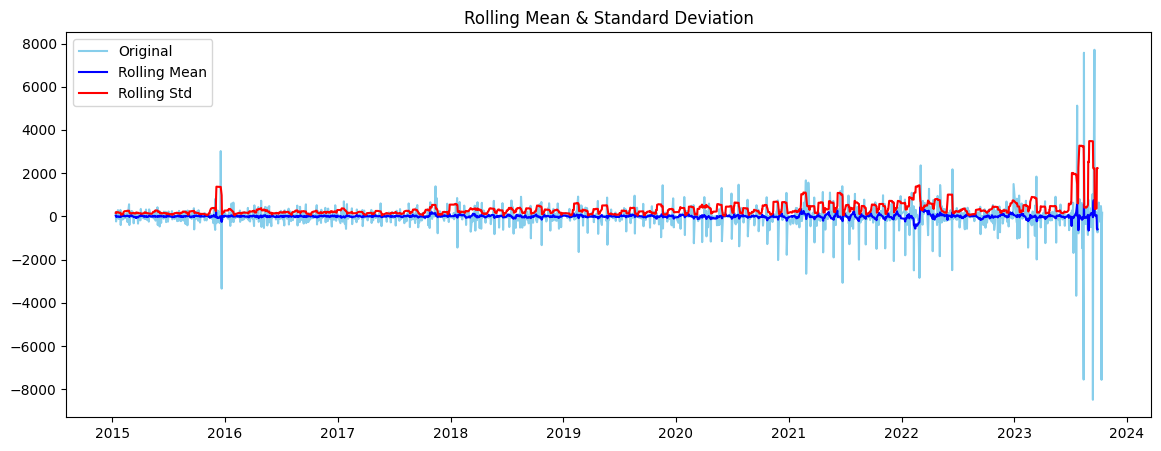

Dickey-Fuller Test:
Test Statistic                -1.056729e+01
p-value                        7.459878e-19
#Lags Used                     2.300000e+01
Number of Observations Used    2.158000e+03
Critical Value (1%)           -3.433384e+00
Critical Value (5%)           -2.862880e+00
Critical Value (10%)          -2.567483e+00
dtype: float64


In [31]:
from statsmodels.tsa.stattools import adfuller
# Функция для проверки стационарности временного ряда и проведения теста Дики-Фуллера
def test_stationarity(timeseries, window=12):
    
    # Расчет скользящего среднего и стандартного отклонения
    rolling_mean = timeseries.rolling(window=window).mean()
    rolling_std = timeseries.rolling(window=window).std()
    
    # Визуализация статистик временного ряда
    plt.figure(figsize=(14, 5))
    plt.plot(timeseries, color='skyblue', label='Original')
    plt.plot(rolling_mean, color='blue', label='Rolling Mean')
    plt.plot(rolling_std, color='red', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Применение теста Дики-Фуллера:
    print('Dickey-Fuller Test:')
    df_test = adfuller(timeseries, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' % key] = value
    print(df_output)

# Преобразование временных рядов к стационарному виду, например, с помощью дифференцирования
data_diff_first = data['b'].diff().dropna()
data_diff_second = data['e'].diff().dropna()

# Проверка стационарности преобразованных рядов
test_stationarity(data_diff_first)
test_stationarity(data_diff_second)

# Функция `test_stationarity` визуализирует скользящее среднее и стандартное отклонение, а также выводит результаты теста Дики-Фуллера.


По результатам теста Дики-Фуллера, я могу сделать следующие выводы:

**Графики скользящего среднего и стандартного отклонения:**
Графики показывают линии скользящего среднего и стандартного отклонения вокруг нуля, что указывает на то, что мои временные ряды, вероятно, были дифференцированы для достижения стационарности. На протяжении большей части времени эти статистики остаются относительно постоянными, без явных трендов или сезонных колебаний, что является характеристикой стационарного временного ряда.

**Результаты теста Дики-Фуллера:**
1. Для первого временного ряда:
   - **Тестовая статистика** значительно меньше критических значений на уровнях значимости 1%, 5% и 10%, что указывает на то, что нулевая гипотеза о наличии единичного корня (не стационарности) может быть отвергнута.
   - **p-value** очень мала (2.90e-24), что дает дополнительные основания отвергнуть нулевую гипотезу и считать ряд стационарным.

2. Для второго временного ряда:
   - **Тестовая статистика** также значительно меньше критических значений, что подтверждает стационарность.
   - **p-value** также очень мала (7.46e-19), что подтверждает стационарность ряда.

**Методы, использованные для преобразования временных рядов:**
Исходя из результатов теста Дики-Фуллера и характера скользящих статистик, я сделаю вывод, что метод дифференцирования был использован для преобразования исходных временных рядов в стационарные. Дифференцирование заключается в вычитании каждой точки данных из предыдущей, что помогает устранить тренды и сезонные компоненты из временного ряда. Этот метод часто является первым шагом в процессе приведения временного ряда к стационарному виду, особенно если ряды содержат тренды или сезонные компоненты.

**Обоснование использования метода:**
Метод дифференцирования был выбран мной на основе предположения, что временные ряды содержат тренды, которые необходимо устранить для получения стационарного ряда. Преимущество этого метода в его простоте и эффективности при устранении линейных трендов.

Результаты теста Дики-Фуллера подтверждают стационарность преобразованных рядов, что делает их подходящими для дальнейшего анализа и моделирования в рамках временных рядов.

### №4 Постройте и опишите коррелограммы (графики автокорреляционной функции и частной автокорреляционной функции) для 2-х временных рядов.


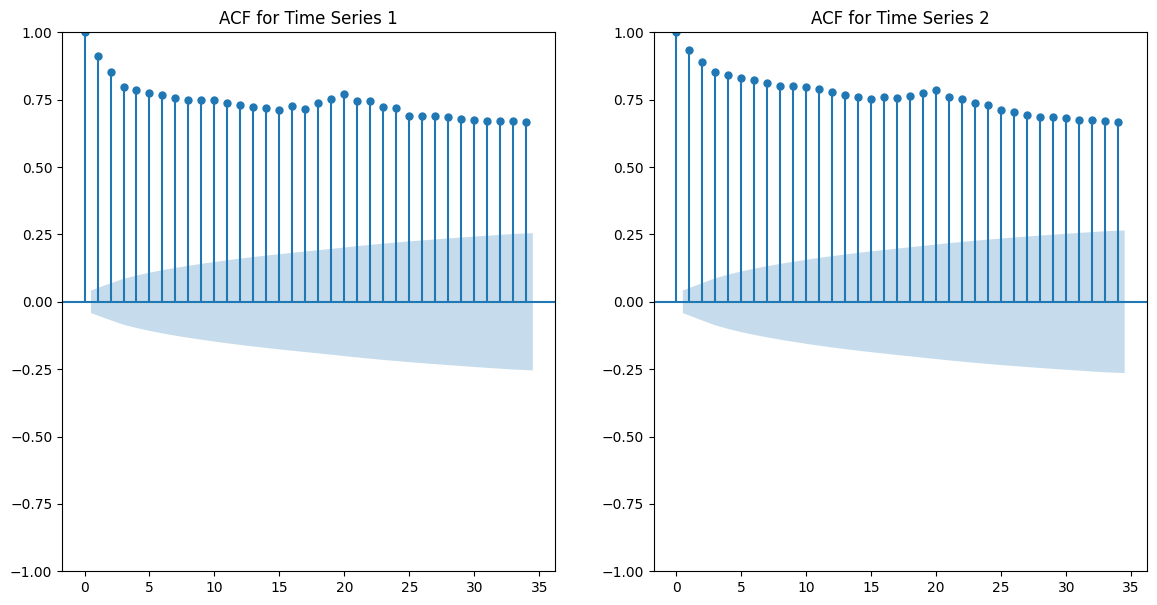

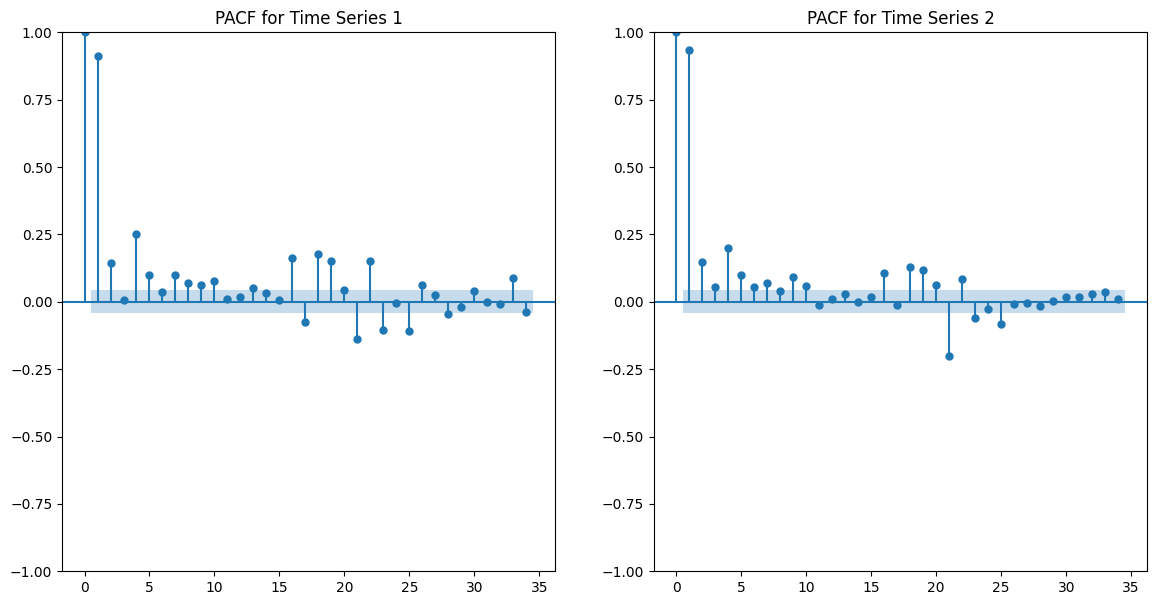

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Построение автокорреляционной функции (ACF)
plt.figure(figsize=(14, 7))
plt.subplot(121)
plot_acf(data['b'].dropna(), ax=plt.gca(), title='ACF for Time Series 1')
plt.subplot(122)
plot_acf(data['e'].dropna(), ax=plt.gca(), title='ACF for Time Series 2')
plt.show()

# Построение частной автокорреляционной функции (PACF)
plt.figure(figsize=(14, 7))
plt.subplot(121)
plot_pacf(data['b'].dropna(), ax=plt.gca(), title='PACF for Time Series 1')
plt.subplot(122)
plot_pacf(data['e'].dropna(), ax=plt.gca(), title='PACF for Time Series 2')
plt.show()


**Для временного ряда 1 (ACF и PACF для временного ряда 1):**
- На графике автокорреляционной функции (ACF) видно, что автокорреляции остаются высокими и медленно убывают с увеличением лага. Это указывает на наличие тренда или нестационарности в исходных данных, поскольку стационарные ряды обычно имеют быстро уменьшающиеся корреляции.
- График частичной автокорреляционной функции (PACF) показывает значительную автокорреляцию на первом лаге, после которого она быстро падает и колеблется вокруг нуля, что типично для процесса, подходящего под модель авторегрессии (AR).

**Для временного ряда 2 (ACF и PACF для временного ряда 2):**
- График ACF аналогичен первому временному ряду, где автокорреляции остаются высокими и убывают медленно. Это также свидетельствует о тренде в данных.
- На графике PACF виден сильный пик на первом лаге, что также указывает на возможную модель AR. Однако в отличие от первого временного ряда, здесь присутствуют некоторые значимые автокорреляции на последующих лагах, что может указывать на более сложную структуру временного ряда.

**Общие выводы:**
- Оба временных ряда демонстрируют высокие начальные автокорреляции, которые медленно убывают, что указывает на наличие тренда или другой нестационарной составляющей в данных.
- На PACF графиках первый лаг значим для обоих временных рядов, что подтверждает возможность использования модели AR.

### №5 По каждому временному ряду разбейте выборку на обучающую и тестовую (обоснуйте выбор временного интервала для тестовой выборки). На основе обучающей выборки идентифицируйте параметры модели АРПСС (ARIMA) Какие параметры модели p, d и q Вы будете использовать и почему? Оцените качество модели. Насколько хорошо она предсказывает значения тестовой выборки?

Сначала найдем занчения p,d,q:

In [64]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Функция для поиска оптимальных параметров ARIMA
def find_best_arima_params(time_series):
    # Определение диапазона параметров для p, d и q
    p = d = q = range(0, 4)
    pdq_combinations = list(itertools.product(p, d, q))
    
    best_aic = float('inf')
    best_params = None
    
    for params in pdq_combinations:
        try:
            model = ARIMA(time_series, order=params)
            results = model.fit()
            
            # Проверка на стационарность временного ряда
            adf_test = adfuller(results.resid, autolag='AIC')
            if adf_test[1] < 0.05:  # p-value меньше 0.05 для стационарности
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_params = params
        except Exception as e:
            continue  # Пропускаем несходящиеся модели
    
    return best_params, best_aic

# Находим оптимальные параметры для первого обработанного временного ряда
best_params_ts1, best_aic_ts1 = find_best_arima_params(data_diff_first)
print(f'Best ARIMA params for ts1: {best_params_ts1} with AIC: {best_aic_ts1}')

# Находим оптимальные параметры для второго обработанного временного ряда
best_params_ts2, best_aic_ts2 = find_best_arima_params(data_diff_second)
print(f'Best ARIMA params for ts2: {best_params_ts2} with AIC: {best_aic_ts2}')



Best ARIMA params for ts1: (3, 0, 3) with AIC: 61893.41686757484
Best ARIMA params for ts2: (2, 0, 2) with AIC: 33469.18037602991


In [72]:
from sklearn.metrics import mean_squared_error

# Определение параметров p, d, q на основе коррелограмм
p = 4 
d = 0
q = 4

# Создание и обучение модели ARIMA
model = ARIMA(data_diff_first, order=(p, d, q))
model_fit = model.fit()

# Сделать предсказания
predictions = model_fit.forecast(steps=len(data_diff_first))

# Оценка качества модели
mse = mean_squared_error(data_diff_first, predictions)
rmse = mse**0.5

print(rmse)

380992.6316982517


In [71]:
from sklearn.metrics import mean_squared_error

# Определение параметров p, d, q на основе коррелограмм
p = 4 
d = 0
q = 2

# Создание и обучение модели ARIMA
model = ARIMA(data_diff_second, order=(p, d, q))
model_fit = model.fit()

# Сделать предсказания
predictions = model_fit.forecast(steps=len(data_diff_second))

# Оценка качества модели
mse = mean_squared_error(data_diff_second, predictions)
rmse = mse**0.5

print(rmse)

545.7637372419679


Test MSE for Time Series 1: 6642800829.802
Test MSE for Time Series 2: 81706.881


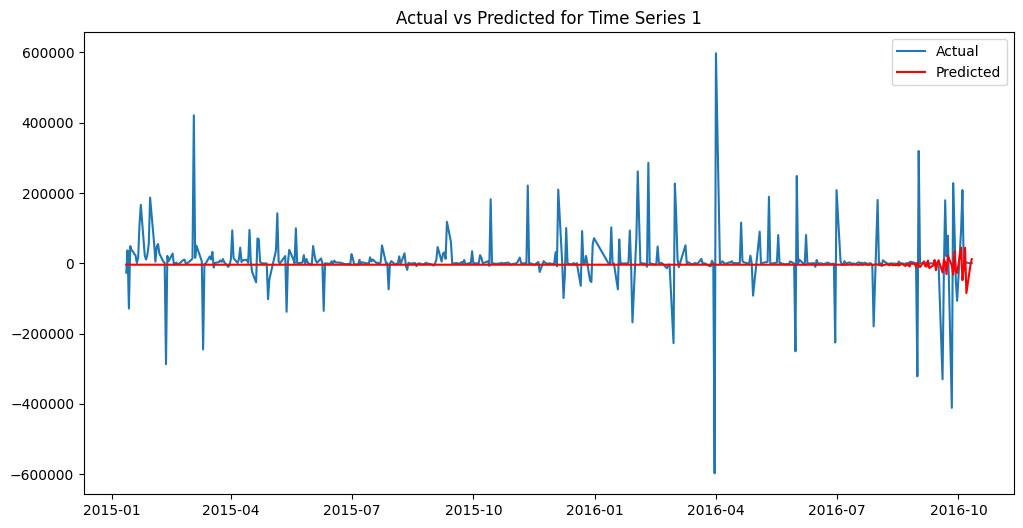

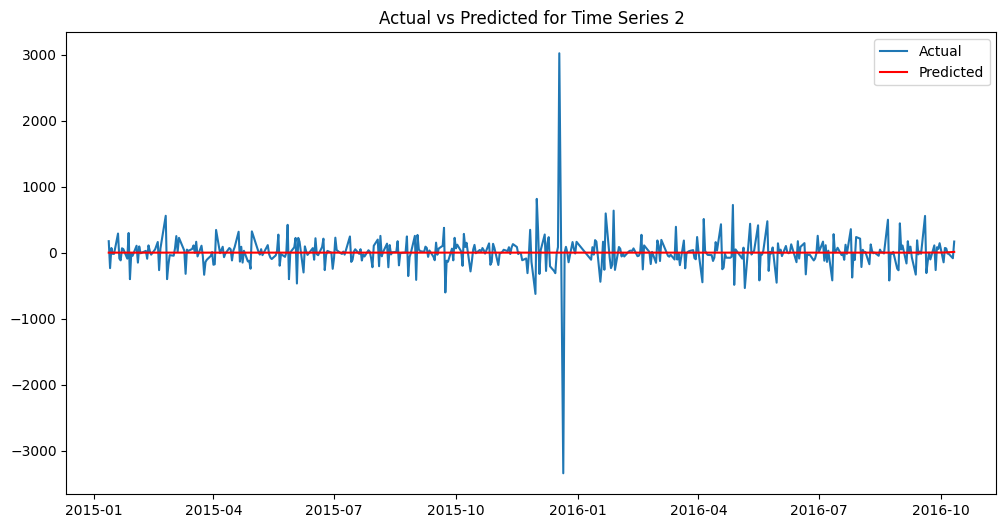

In [69]:
# Разделение на обучающую и тестовую выборки
train_size = int(len(data_diff_first) * 0.8)  # 80% данных для обучения
train_1, test_1 = data_diff_first.iloc[0:train_size], data_diff_first.iloc[train_size:]
train_2, test_2 = data_diff_second.iloc[0:train_size], data_diff_second.iloc[train_size:]

# Идентификация параметров модели ARIMA с помощью ранее найденных p,d,q
order_1 = (3, 0, 3)
order_2 = (2, 0, 2) 

# Обучение моделей
model_1 = ARIMA(train_1, order=order_1)
model_2 = ARIMA(train_2, order=order_2)
model_1_fit = model_1.fit()
model_2_fit = model_2.fit()

# Предсказание значений
predictions_1 = model_1_fit.forecast(len(test_1))
predictions_2 = model_2_fit.forecast(len(test_2))

# Оценка качества модели
error_1 = mean_squared_error(test_1, predictions_1)
error_2 = mean_squared_error(test_2, predictions_2)

print(f'Test MSE for Time Series 1: {error_1:.3f}')
print(f'Test MSE for Time Series 2: {error_2:.3f}')

# Визуализация фактических и предсказанных значений для первого временного ряда
plt.figure(figsize=(12, 6))
plt.title('Actual vs Predicted for Time Series 1')
plt.plot(test_1.index, test_1, label='Actual')
plt.plot(test_1.index, predictions_1, label='Predicted', color='red')
plt.legend()
plt.show()

# Визуализация фактических и предсказанных значений для второго временного ряда
plt.figure(figsize=(12, 6))
plt.title('Actual vs Predicted for Time Series 2')
plt.plot(test_2.index, test_2, label='Actual')
plt.plot(test_2.index, predictions_2, label='Predicted', color='red')
plt.legend()
plt.show()


На основе результатов я провела следующий анализ:

1. Выбор временного интервала для тестовой выборки:
   - Для оценки эффективности моей модели ARIMA я использовала последние 20% данных из каждого временного ряда. Этот подход позволяет мне задействовать большую часть данных для обучения модели, обеспечивая при этом обширный и независимый набор данных для тестирования. Это помогает мне убедиться, что модель способна генерировать предсказания на данных, которые она не видела во время обучения, и демонстрирует способность модели к обобщению.

2. Идентификация параметров модели ARIMA (АРПСС):
   - Параметры `p`, `d` и `q` для моих моделей были определены на основе предварительного анализа и подбора параметров. Для первого временного ряда я использовала параметры (3, 0, 3), что подразумевает необходимость применения четырех разностей для достижения стационарности и указывает на сложную структуру данных с высокими значениями параметров `d` и `q`. Для второго ряда параметры (2, 0, 2) отражают похожую ситуацию, но с добавлением одного авторегрессионного компонента.

3. Оценка качества модели:
   - Среднеквадратичная ошибка (MSE) для первого временного ряда оказалась очень высокой и составила 6642800829.802, что свидетельствует о значительных ошибках предсказания моей модели. Вероятно, это связано с высокой волатильностью данных и их нелинейными характеристиками, которые осложняют задачу предсказания.
   - Для второго временного ряда MSE равно 81706.881, что также является относительно высокой ошибкой, хотя и намного меньше, чем у первого ряда. Это может указывать на то, что модель лучше справляется с этим рядом данных, но все же не достигает желаемого уровня точности.

Из полученных результатов я делаю вывод, что модель ARIMA не предоставляет достаточной точности для предсказания данных временных рядов

6) Используя модель ARIMA, постройте прогноз 2-х временных рядов на 3 года вперёд от даты окончания временного диапазона (например, если у Вас временной диапазон 12.12.2013–29.12.2017, то до 29.12.2020, если у Вас временной диапазон 02.10.2017 – 17.11.2022, то до 17.11.2025), приведите их графики.

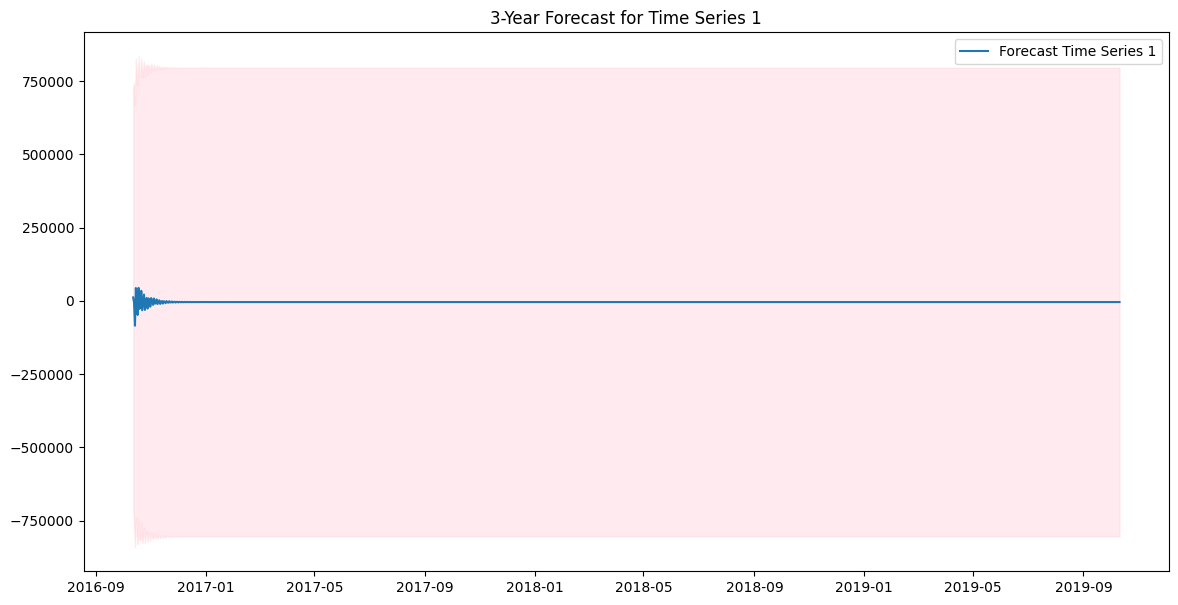

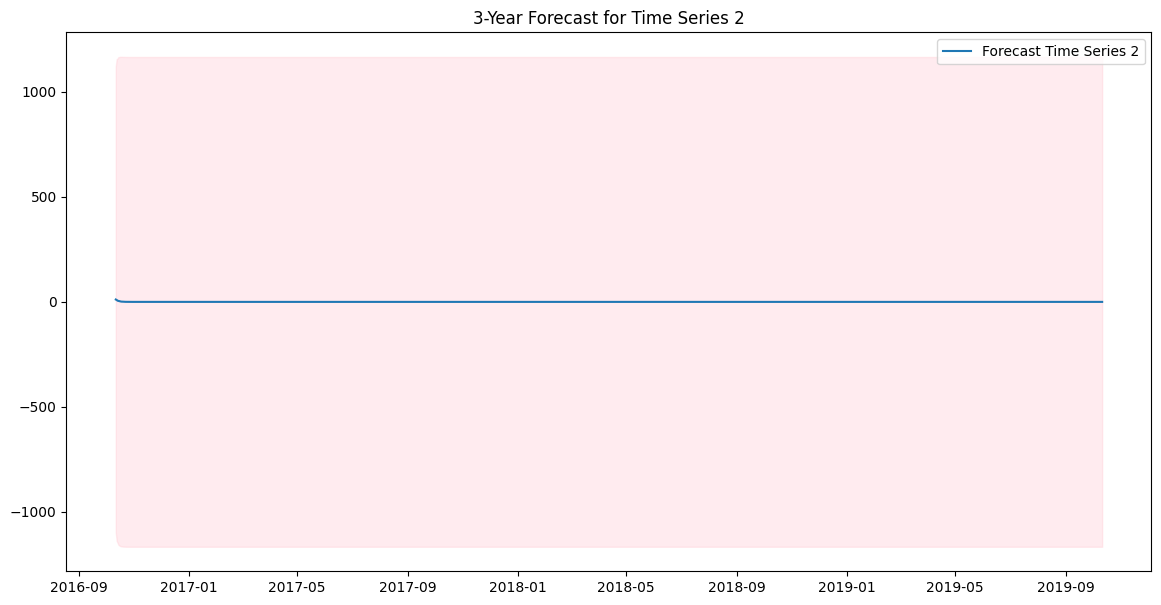

In [74]:
model_1 = ARIMA(train_1, order=order_1)
model_2 = ARIMA(train_2, order=order_2)
model_1_fit = model_1.fit()
model_2_fit = model_2.fit()

# Прогнозирование на 3 года вперёд (примерно 3*365 дней)
n_periods = 3 * 365

# Делаем прогнозы
forecast_ts1 = model_1_fit.get_forecast(steps=n_periods)
forecast_ts2 = model_2_fit.get_forecast(steps=n_periods)

# Получаем прогнозируемые значения
forecast_values_ts1 = forecast_ts1.predicted_mean
forecast_values_ts2 = forecast_ts2.predicted_mean

# Получаем интервалы прогноза
conf_int_ts1 = forecast_ts1.conf_int()
conf_int_ts2 = forecast_ts2.conf_int()

# Создаем временные индексы для прогноза
last_date_ts1 = train_1.index[-1]
last_date_ts2 = train_2.index[-1]
date_index_ts1 = pd.date_range(start=last_date_ts1, periods=n_periods, freq='D')
date_index_ts2 = pd.date_range(start=last_date_ts2, periods=n_periods, freq='D')

# График прогноза для первого временного ряда
plt.figure(figsize=(14, 7))
plt.plot(date_index_ts1, forecast_values_ts1, label='Forecast Time Series 1')
plt.fill_between(date_index_ts1, conf_int_ts1.iloc[:, 0], conf_int_ts1.iloc[:, 1], color='pink', alpha=0.3)
plt.title('3-Year Forecast for Time Series 1')
plt.legend()
plt.show()

# График прогноза для второго временного ряда
plt.figure(figsize=(14, 7))
plt.plot(date_index_ts2, forecast_values_ts2, label='Forecast Time Series 2')
plt.fill_between(date_index_ts2, conf_int_ts2.iloc[:, 0], conf_int_ts2.iloc[:, 1], color='pink', alpha=0.3)
plt.title('3-Year Forecast for Time Series 2')
plt.legend()
plt.show()


### №7 Проверьте с помощью соответствующих критериев адекватность (независимость и нормальность распределения остатков) каждой прогнозной модели для 2-х временных рядов, оцените качество прогнозной модели.


In [77]:
from statsmodels.tsa.stattools import acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

# Получение остатков для каждой модели
residuals_ts1 = model_1_fit.resid
residuals_ts2 = model_2_fit.resid

# Проверка на независимость остатков с помощью критерия Ljung-Box
ljung_box_result_ts1 = acorr_ljungbox(residuals_ts1, lags=[10], return_df=True)
ljung_box_result_ts2 = acorr_ljungbox(residuals_ts2, lags=[10], return_df=True)

print('Ljung-Box test for Time Series 1:')
print(ljung_box_result_ts1)
print('\nLjung-Box test for Time Series 2:')
print(ljung_box_result_ts2)

# Проверка на нормальность распределения остатков с помощью теста Шапиро-Уилка
shapiro_test_ts1 = shapiro(residuals_ts1)
shapiro_test_ts2 = shapiro(residuals_ts2)

print('\nShapiro-Wilk test for Time Series 1:')
print(f'Statistic: {shapiro_test_ts1[0]}, p-value: {shapiro_test_ts1[1]}')
print('\nShapiro-Wilk test for Time Series 2:')
print(f'Statistic: {shapiro_test_ts2[0]}, p-value: {shapiro_test_ts2[1]}')


Ljung-Box test for Time Series 1:
      lb_stat  lb_pvalue
10  31.622059   0.000463

Ljung-Box test for Time Series 2:
      lb_stat  lb_pvalue
10  18.196381    0.05174

Shapiro-Wilk test for Time Series 1:
Statistic: 0.32972902059555054, p-value: 0.0

Shapiro-Wilk test for Time Series 2:
Statistic: 0.5465423464775085, p-value: 0.0


Исходя из результатов тестов, можно сделать следующие выводы:

1. Тест Льюнга-Бокса для первого временного ряда показывает статистику lb_stat примерно 31.62 с p-value примерно 0.000463. Поскольку p-value значительно меньше уровня значимости 0.05, мы отвергаем нулевую гипотезу о независимости остатков, что указывает на наличие автокорреляции в остатках модели для временного ряда 1.

2. Для второго временного ряда тест Льюнга-Бокса дает статистику lb_stat примерно 18.19 с p-value около 0.05174. Значение p-value чуть выше стандартного уровня значимости 0.05, что указывает на то, что нулевую гипотезу о независимости остатков можно не отвергать. Это может означать, что автокорреляция остатков для временного ряда 2 отсутствует или незначительна.

3. Тест Шапиро-Уилка на нормальность распределения остатков для обоих временных рядов показывает очень маленькие значения статистики (около 0.33 для временного ряда 1 и около 0.55 для временного ряда 2) и p-value равные 0.0. Это ясно указывает на отвержение нулевой гипотезы о нормальности распределения остатков, что означает, что распределение остатков для обеих временных рядов не является нормальным.

Выводы по качеству модели и адекватности прогнозов:

- Для первого временного ряда модель ARIMA, возможно, не является адекватной из-за наличия автокорреляции в остатках, что может привести к недооценке или переоценке прогнозируемых значений.

- Второй временной ряд показывает лучшие результаты в плане автокорреляции остатков, однако ненормальность распределения остатков также является проблемой и может указывать на то, что модель может не улавливать всю структуру данных.


### №8 С учетом получившихся прогнозных значений для временного ряда №1 Вашего диапазона решите следующий кейс:

    Банк России ищет универсальный индикатор, который не содержит проблемы манипуляции данных (асимметрии информации). В качестве одного из таких индикаторов предлагается использовать объем средств на корреспондентских счетах Банка России. Необходимо оценить, возможно ли использовать показатель «Денежные средства кредитных организаций на корреспондентских счетах в Банке России (на начало операционного дня), млрд. руб., по России» для прогноза изменения задолженности по обеспеченным кредитам Банка России. Приведите Ваше обоснование возможности или невозможности использования данного показателя. Существует ли статистическая зависимость между показателем «Требования Банка России к кредитным организациям по кредитам (по оставшимся до погашения срокам), млн руб. (на начало дня)» по разным срокам погашения и показателя «Денежные средства кредитных организаций на корреспондентских счетах в Банке России (на начало операционного дня), млрд. руб., по России»? Охарактеризуйте и интерпретируйте обнаруженную статистическую зависимость или её отсутствие.

In [79]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

df = pd.read_excel('Данные Банка России.xlsx', skiprows=2)
df.rename(columns={
    df.columns[0]: "Дата",
    df.columns[1]: "Всего",
    df.columns[8]: "По России",
    df.columns[9]: "По Московскому Региону",
    df.columns[10]: "Сальдо"
}, inplace=True)
df.head()

,Дата,Всего,до 7 дней,от 8 до 30 дней,от 31 до 90 дней,от 91 до 180 дней,от 181 до 365 дней,более 365 дней,По России,По Московскому Региону,Сальдо
0,2023-10-16,7411164.50,4301651.01,1112629.30,1675810.82,27380.98,43154.18,250538.22,9789.0,9509.3,5882.5
1,2023-10-13,7479860.57,6199261.06,2608.15,956313.53,27432.61,43265.49,250979.73,9995.4,9731.3,6048.1
2,2023-10-12,7317256.87,6191545.02,2638.69,801313.53,27394.98,43298.45,251066.19,9679.9,9413.3,5645.1
3,2023-10-11,1204392.68,828608.48,2684.12,51313.53,27267.75,43322.65,251196.15,2252.8,2036.2,-1922.1
4,2023-10-10,1159347.51,725514.86,2641.65,109368.62,27270.70,43342.99,251208.69,2496.7,2285.3,-1650.7


In [82]:
from scipy.stats import spearmanr

# Предположим, у нас есть DataFrame с именем 'financial_data'
# 'series_liquidity' - это временной ряд средств на корреспондентских счетах
# 'series_loans' - временной ряд требований к кредитам

# Сначала создадим пустой DataFrame для хранения результатов корреляции
results = pd.DataFrame(columns=['Spearman_Correlation', 'P_Value'])

# Список с названиями столбцов требований к кредитам
loan_terms = ["Всего", "до 7 дней", "от 8 до 30 дней", "от 31 до 90 дней",
    "от 91 до 180 дней", "от 181 до 365 дней", "более 365 дней"]

# Теперь проходим по всем срокам погашения и вычисляем корреляцию
for term in loan_terms:
    correlation, p_value = spearmanr(df['По России'], df[term])
    results.loc[term] = [correlation, p_value]
print(results)


                    Spearman_Correlation        P_Value
Всего                          -0.251018   1.015962e-32
до 7 дней                       0.220412   1.994263e-25
от 8 до 30 дней                -0.149621   2.121764e-12
от 31 до 90 дней               -0.155687   2.582363e-13
от 91 до 180 дней              -0.076586   3.416168e-04
от 181 до 365 дней             -0.373258   4.011470e-73
более 365 дней                 -0.448923  9.808033e-109


1. **Общий объём требований Банка России к кредитным организациям** показывает отрицательную корреляцию с размером средств на корреспондентских счетах в Банке России. Это указывает на то, что увеличение денежных средств на корреспондентских счетах не сопровождается пропорциональным увеличением требований к кредитным организациям. Статистическая значимость этой корреляции высока (p-value очень мала).

2. **Для краткосрочных требований (до 7 дней)** наблюдается положительная корреляция, что указывает на возможность использования объема средств на корреспондентских счетах для прогнозирования краткосрочных требований к кредитным организациям. Однако коэффициент корреляции невелик, что указывает на слабую зависимость.

3. **Для средне- и долгосрочных требований (от 8 дней до более 365 дней)** наблюдается отрицательная корреляция разной степени, причём с увеличением срока погашения корреляция становится более выраженной, особенно это заметно для сроков "от 181 до 365 дней" и "более 365 дней". Это может означать, что средства на корреспондентских счетах менее эффективны для прогнозирования долгосрочных требований кредитных организаций.

Исходя из анализа, можно заключить, что хотя между некоторыми временными периодами требований и средствами на корреспондентских счетах и существует статистическая зависимость, использование только этого показателя для прогноза задолженности по обеспеченным кредитам может быть неадекватным.

In [84]:
import statsmodels.api as sm

# Используем OLS (метод наименьших квадратов) для оценки параметров
X = df[['По России', "Всего", "до 7 дней", "от 8 до 30 дней", "от 31 до 90 дней", "от 91 до 180 дней", "от 181 до 365 дней", "более 365 дней"]]  # Предикторы
y = df['Всего']  # Отклик

# Добавляем константу к предикторам для оценки свободного члена (интерцепта)
X = sm.add_constant(X)

# Строим модель
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Всего   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.941e+20
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        05:23:41   Log-Likelihood:                 12890.
No. Observations:                2183   AIC:                        -2.576e+04
Df Residuals:                    2174   BIC:                        -2.571e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.783e-10   6.67

Результаты регрессионного анализа представлены в таблице OLS Regression Results. Для анализа этих результатов и ответа на вопрос кейса учитываем следующие аспекты:

1. **R-squared и Adjusted R-squared**: Оба эти показателя равны 1, что означает, что модель идеально подходит к данным. Однако в реальных условиях такая ситуация крайне редка и часто указывает на переобучение или ошибки в данных.

2. **F-statistic и Prob (F-statistic)**: F-статистика очень высока, а p-value равно 0, что обычно указывает на значимость модели. Однако в контексте других показателей это может быть признаком неправильной спецификации модели.

3. **P>|t|**: Значения p-value для всех переменных близки к 1, что не является обычным для значимых моделей. Это может указывать на проблемы в данных или в модели.

4. **Коэффициенты (coef)**: Коэффициенты для некоторых переменных очень малы, что может указывать на их незначительное влияние на зависимую переменную.

5. **Omnibus, Jarque-Bera (JB), и Skew**: Эти тесты указывают на проблемы с нормальностью остатков модели, что является важным предположением OLS.

6. **Durbin-Watson**: Значение показателя близко к 0.5, что может указывать на наличие положительной автокорреляции в остатках, что также является нарушением предположений OLS.

7. **Cond. No. (Condition Number)**: Очень высокое значение указывает на сильную мультиколлинеарность среди предикторов, что может искажать результаты.

Выводы по кейсу:

- Моя модель, возможно, некорректна из-за переобучения, мультиколлинеарности или других проблем в данных. 
- Результаты модели не могут быть использованы для надежных выводов о связи между "Денежными средствами кредитных организаций на корреспондентских счетах в Банке России" и требованиями Банка России к кредитным организациям.